<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/STAT380_3_3_(2025)_the_generalized_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The GLM

So we've talked about probability models, and we've talked about likelihoods.  We now have the ingredients we need to talk about the **generalized linear model.**

Consider observations $(Y_i, X_i)$ for $i = \{1,...,n\}$ of response $Y_i$ and (for simplicity) single covariate $X_i$. You are well-acquainted with ordinary linear regression models of the form:

$$E(Y_i|X_i) = \beta_0 + \beta_1 X_i$$



In [ ]:
# GLM is basically the same as logistic regression.


The *generalized linear model*, or GLM, generalizes this relationship by way of a ***link function.*** Specifically:

$$g(E(Y_i|X_i)) = \beta_0 + \beta_1 X_i.$$


The default link function, also called the ***canonical*** link function, depends on the probability model specified for $Y$: binomial, Poisson, normal, etc.

To fit a GLM, we need to specify:


* The *linear term*, which for a single $X_i$ is just $\beta_0 + \beta_1 X_i$
* The *family*; what probability model is appropriate for the $Y_i$?
* The *link function* $g()$; which links $E(Y_i|X_i)$ to the linear term $\beta_0 + \beta_1 X_i$.  

## Fitting GLMs in `R`

GLMs can be specified in R for a single covariate like so:

```nfit <- glm(y~x, data = df, family = 'gaussian') #Equivalent to lm()```

```bfit <- glm(y~x, data = df, family = 'binomial')```

```pfit <- glm(y~x, data = df, family = 'poisson')```

Negative binomial GLMs are not available in base R but can be fit using external packages; more later.

Note the canonical links used by default for each family in the `R` help file below:

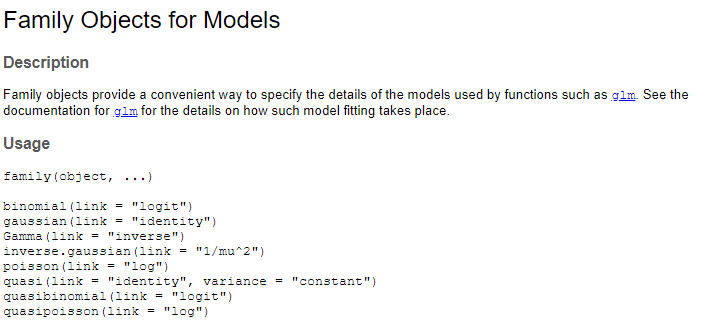

## Canonical links

The canonical (default) link function for the various probability families are below.  The mathematical details (and an optional extra credit assignment) are in the next notebook.

* Normal family: *identity link*
  - $ g(E(Y_i|X_i)) = \beta_0 + \beta_1 X_i$
  

* Binomial (assuming binary $Y_i$, so $Y_i\sim BIN(1, p)$): *logit link*
  * $g(E(Y_i|X_i)) = g(p_i) = \ln\left(\frac{p_i}{1-p_i}\right) = \beta_0 + \beta_1 X_i$


* Poisson: *log link*
  * $g(E(Y_i|X_i)) = g(\lambda_i \cdot t) =\ln(\lambda_i\cdot t) = \beta_0 + \beta_1X_i$


## Canonical links are not the only options!

While specifying a family specifies a default link function, you don't have to use it!

E.g., you can fit a log link using binary data:

```binomialfit.loglink <-glm(y~x, data = df, family=binomial(link='log'))```

Using the log link instead of the canonical logit link will actually fit relative risk regression instead of regular logistic regression using odds ratios; more on this later.




## Link functions are *not* transformations


Note that a GLM  is *not* the same as an ordinary linear regression with a transformed response.  This is because in general, $E(g(Y)) \ne g(E(Y))$.  

* $E(g(Y))$ is an ordinary linear regression of a transformed response.
  - Coefficients are interpreted like you would any ordinary linear regression, just with the response on the transformed scale.
* $g(E(Y))$ is a GLM of a non-transformed response using link function $g$.
  - Coefficients may be better interepreted as a multiplicative change in the originally-scaled response.

## Why it's important that $E(g(Y)) \ne g(E(Y))$

Consider the following tiny data set:

In [1]:
df <- data.frame(x = rep(c(0,1),each = 4),
                y = c(0, 0,  1, 0, 0, 1, 1, 1))
df

x,y
<dbl>,<dbl>
0,0
0,0
0,1
0,0
1,0
1,1
1,1
1,1


Consider the log-link function $g(z) = \ln(z)$. Consider these two models:

* Model 1:

$$E(g(Y_i)|X_i) = \beta_0 + \beta_1 X_i$$

* Model 2:

$$g(E(Y_i|X_i)) = \beta_0 + \beta_1 X_i$$

* Is it possible to fit Model 1?  If so, estimate the coefficients.  If not, explain why not.
* Is it possible to fit Model 2?  If so, estimate the coefficients.  If not, explain why not.


In [3]:
# Try to fit Model 1. log transform Y:
# You cannot take natural log of 0 because its infinity.
lm(log(y)~x, data = df)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


# Where do the likelihoods fit in?

For simple ordinary linear regression of the form $Y = \beta_0 + \beta_1 X$, the coefficients $\beta_0$ and $\beta_1$ are chosen to minimize the sum-of-squared residuals, among all possible lines:

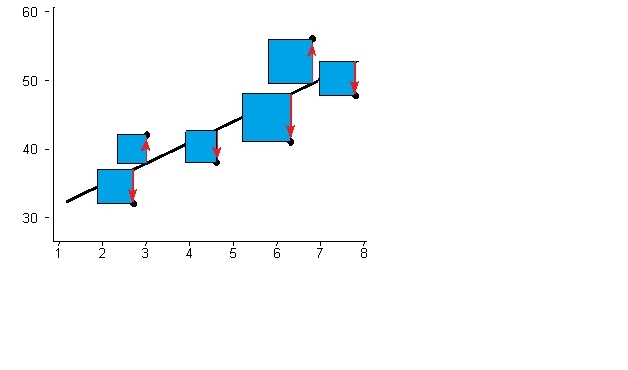

For GLMs, the parameters are estimated via *maximum likelihood*, and we compare models using AIC/BIC, which depend on the *maximized likelihoods* for various models.